# Video Games Sales - Clustering by Sales Similarities

<img src="https://oyster.ignimgs.com/mediawiki/apis.ign.com/super-mario-wii-u/2/25/Mario_Artwork_-_Super_Mario_3D_World.png?width=1920" alt='Mario' width="150">



&emsp; **"Wahoo!"** - Mario

This project explores the world of video games and their sales data. Exploratory data analysis will be conducted to __identify which gaming platforms and regions have seen the most game sales__, as well as study __the sales surrounding 7th Generation Consoles__ (Nintendo Wii, PS3, Xbox360). Further, a __clustering algorithm will be trained to group video games that share similar sales characteristics__, which can in turn help game designers and publishers to understand potential patterns behind video games that see similar level of sales.

The dataset used contains data surrounding popular video game sales that have seen at least 100k global sales. Beyond the game titles and sales for different region, the dataset also contains features such as the games' <code>Year</code> of release, <code>Platform</code>, <code>Genre</code> and <code>Publisher</code>.

The data being used was sourced from [Video Games Sales](https://www.kaggle.com/datasets/gregorut/videogamesales).

This study involves the following sections:

1. Data validation - Initial data overview, data cleaning
2. Exploratory Data Analysis - Visualizing data through barplots of sales and lineplots showing changes over time
3. Machine Learning - Developing and evaluating a clustering machine learning model for video games based on their sales data

## 💾 1. __Data Validation__

Let's begin by importing packages, getting an overview of the dataset, and identifying potential issues with the data.

In [1]:
# Import packages for numeric operations and working with structured data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Import packages for unsupervised learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read in CSV file as a DataFrame and inspect first 20 rows
games_df = pd.read_csv("vgsales.csv", index_col=0)
games_df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


The above reveals the dataset columns:

- <code>Name</code> : Name of the game
- <code>Platform</code> : Platform of the games release (i.e. PC,PS4, etc.)
- <code>Year</code> : Year the game was released in
- <code>Genre</code> : Genre of the game
- <code>Publisher</code> : Publisher of the game
- <code>NA_Sales</code> : Number of sales in North America (in millions)
- <code>EU_Sales</code> : Number of sales in Europe (in millions)
- <code>JP_Sales</code> : Number of sales in Japan (in millions)
- <code>Other_Sales</code> : Number of sales in other parts of the world (in millions)
- <code>Global_Sales</code> : Number of total sales (in millions)

In [2]:
# Obtain DataFrame general information
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [3]:
# Print a Pandas Series showing any columns containing missing values and the respective missing value sum for that column
col_with_na = games_df.isna().sum().sort_values(ascending = False)
col_with_na_only = col_with_na[col_with_na > 0]

# Create column with the percentage 
col_with_na_only_perc = (round((col_with_na_only/len(games_df)),4) * 100).map('{:.2f}%'.format)

# Combine the count of missing values with the percent
combined_missing = pd.concat([col_with_na_only, col_with_na_only_perc], axis=1).rename(columns = {0: 'Sum of missing values', 1: 'Percentage of total'})
combined_missing.head()

,Sum of missing values,Percentage of total
Year,271,1.63%
Publisher,58,0.35%


In [4]:
# Drop missing values given they account for a small fraction of the total
games_df = games_df.dropna()

# Check new number of rows in DataFrame
len(games_df)

16291

In [5]:
# Check the data for duplicate observations
games_df_dup = games_df.duplicated().sum()
print(f'The number of duplicate observations is {games_df_dup}')

# Check for games which may have duplicated 'Name'
games_name_dup = games_df.duplicated(subset = 'Name')
games_df[games_name_dup].head(10)

The number of duplicate observations is 0


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
68,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.59


In [6]:
# Inspect the number of unique values for categorical variable
games_df_catcount = games_df.select_dtypes(include=['object']).nunique().head()
games_df_catcount

Name         11325
Platform        31
Genre           12
Publisher      576
dtype: int64

In [7]:
# Get the 'Year' column from games_df
games_df_year = games_df['Year'].astype('int')

# Extract just the years from the DATE_SOLD column into a list, then print them in a string
print(f'The dataset contains games that were published between the years of {games_df_year.min()} and year {games_df_year.max()}')

The dataset contains games that were published between the years of 1980 and year 2020


### __Data Validation Insights__

- The original dataset consisted of 16,598 observations, but after dropping rows with missing values, there are now 16,291, each relating to a unique video game and its features. Observations which had missing values in the <code>Year</code> and <code>Publisher</code> column were removed as they together only accounted for at most 2% of the total data. Given more time and research, the missing values could be imputed manually for each observation. 
- There are no row duplicates in the DataFrame. Although the <code>Name</code> column does have duplicates, they refer to the same game published for different platforms with their corresponding sales, and hence are considered a unique entry.
- There are 3 categorical variables, and inspecting them reveals that there exist 31 unique values for <code>Platform</code>, 12 for <code>Genre</code> and 576 for <code>Publisher</code>.
- Dataset includes games that were published between the years of 1980 and 2020.

## 🔎 2. __Analyzing Total Sales per Region__

Now that the data has been validated and missing values have been addressed, let's explore and visualize the dataset in more detail.

### __Analysing Relationships between Sales numbers, Region of Sales, and Gaming Platforms__

Let's visualize video game sales by <code>Region</code>, by <code>Platform</code>, and then by both, to compare and gauge differences in sales for the regions included in the dataset, and popularity of gaming platforms.

Game sales per region in millions:
NA_Sales 4327.65
EU_Sales 2406.69
JP_Sales 1284.27
Other_Sales 788.91


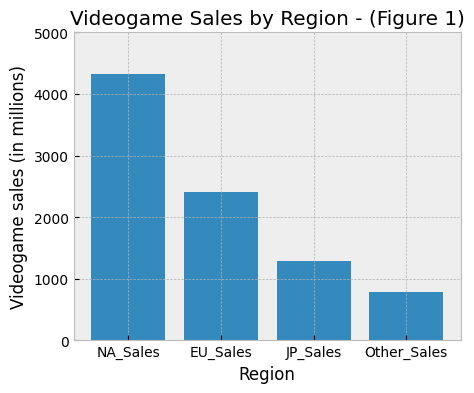

In [ ]:
# Set plotting style
plt.style.use('bmh')

# Subset DataFrame to include only the number of sales per region, then print the totals per region
games_region_total_sales = games_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print('Game sales per region in millions:')
for lab, row in games_region_total_sales.iteritems():
	print(('%s %.2f') % (lab, row))
  
# Plot the sales per region in a bar graph for a graphic comparative analysis
x_labels = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

# Set figure size
plt.figure(figsize=(5, 4))

# Set labels
plt.title('Videogame Sales by Region - (Figure 1)')
plt.ylabel('Videogame sales (in millions)')
plt.xlabel('Region')

# Set y-range
plt.ylim(0, 5000)

# Create a barplot of total videogame sales by Region
plt.bar(x_labels, games_region_total_sales)
plt.show()

In [ ]:
# Identify how many game titles belong to each platform
titles_per_platforms = games_df[['Platform']].value_counts().rename('Number of Game Titles Releases')
print(titles_per_platforms.head())

# Identify the total global sales per platform
games_sales_per_platform_df = games_df.groupby('Platform')[['Platform','Global_Sales']].sum('Global_Sales').sort_values(by='Global_Sales', ascending=False)

# Rename the columns of the DataFrame for clarity
games_sales_per_platform_df.rename(columns={'Global_Sales': 'Global Videogame Sales (in Millions)'}, inplace=True)

# Merge the Pandas Series with the DataFrame
games_platform_sales_and_releases_df = games_sales_per_platform_df.merge(titles_per_platforms, how='left', on='Platform')

games_platform_sales_and_releases_df.head(40)

Platform
DS          2131
PS2         2127
PS3         1304
Wii         1290
X360        1234
Name: Number of Game Titles Releases, dtype: int64


,Global Videogame Sales (in Millions),Number of Game Titles Releases
Platform,,
PS2,1233.46,2127
X360,969.60,1234
PS3,949.35,1304
Wii,909.81,1290
DS,818.91,2131
PS,727.39,1189
GBA,305.62,786
PSP,291.71,1197
PS4,278.10,336


In [ ]:
# Create an index list in alphabetical order to reindex each DataFrame subset generated
platform_unique = sorted(games_df.Platform.unique())
print(platform_unique)

print('\n')

def region_sales_per_platform(region, data=games_df):
    sales_per_platform = data.groupby('Platform')[region].sum().reindex(platform_unique)
    return sales_per_platform

# Select columns from games_df which relate to the number of sales in a region
regions_list = games_df.columns[games_df.columns.str.contains("Sales")]
for region in regions_list:
    print(region)
    
print('\n')

# Create a dictionary that dynamically stores the region names as keys, and the sum of sales per platform in that region as values
region_sales_per_platform_dict={}

for region in regions_list:
    key = region + '_per_platform'
    region_sales_per_platform_dict[key] = region_sales_per_platform(region)

# Check for dictionary key names
print(region_sales_per_platform_dict.keys())

# Transform dictionary items into individual variables
locals().update(region_sales_per_platform_dict)

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


dict_keys(['NA_Sales_per_platform', 'EU_Sales_per_platform', 'JP_Sales_per_platform', 'Other_Sales_per_platform', 'Global_Sales_per_platform'])


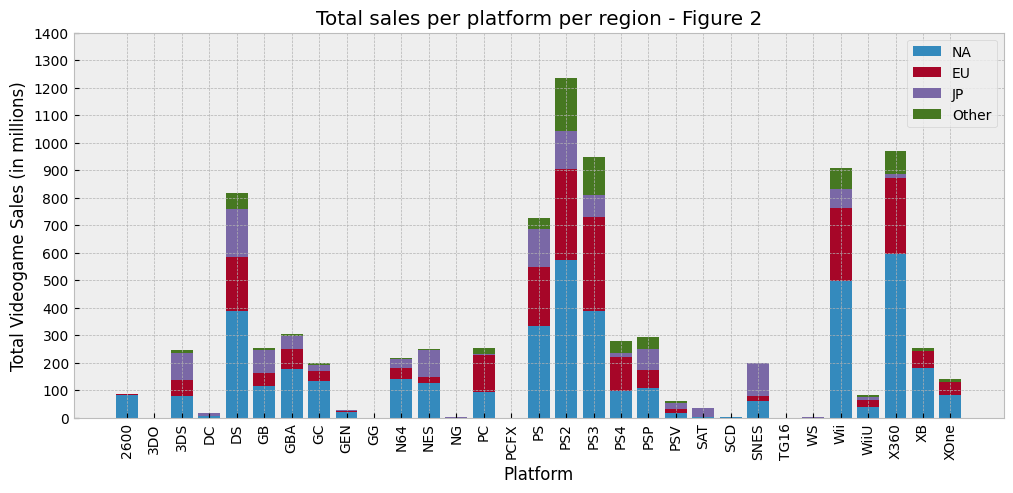

In [ ]:
# Create figure and axis object
fig, ax = plt.subplots(figsize=(12, 5))

# Create a stacked bar plot of total sales per platform coloured by the region of sale
ax.bar(platform_unique, NA_Sales_per_platform, label='NA')
ax.bar(platform_unique, EU_Sales_per_platform, label='EU', bottom=NA_Sales_per_platform)
ax.bar(platform_unique, JP_Sales_per_platform, label='JP', bottom=NA_Sales_per_platform + EU_Sales_per_platform)
ax.bar(platform_unique, Other_Sales_per_platform, label='Other', bottom=NA_Sales_per_platform + EU_Sales_per_platform + JP_Sales_per_platform)

# Set labels
ax.set_ylabel('Total Videogame Sales (in millions)')
ax.set_xlabel('Platform')
ax.set_title('Total sales per platform per region - Figure 2')

# Add legend
ax.legend()

# Format ticks
plt.yticks(np.arange(0, max(Global_Sales_per_platform) + 200, 100))
plt.xticks(rotation = 90)

plt.show()

### Insights on Relationships between Sales numbers, Region of Sales, and Gaming Platforms

- Figure 1 shows that North America accounts for most video game sales internationally with 4.3 billion sales, followed by Europe and then Japan. All other international video game sales outside of NA, EU and JP make up for less sales than Japan alone as a country!

- The 5 platforms with the most global sales are also the top 5 platforms with the most game title releases. The PS2 is the only videogame platform with over 1 billion videogame sales, seeing 1.23 billion global sales. Comparatively, the Nintendo DS is the platform with the most videogame releases, but 5th with most sales.

- Figure 2 shows the relationship between platform sales per region and shows how The Nintendo DS is by far the most popular handheld console, while the PS2 is the most popular video game platform of all time. Competing 7th generation consoles such as the Nintendo Wii, PS3 and Xbox360 saw similar levels of game sales globally. SNES games had more sales in Japan than the rest of the world combined.

### __Analysing Relationship Between Videogame Releases, Sales and Year of Release__

Next let's study how video game sales changed over time, with a focus on 7th generation gaming consoles.

In [ ]:
# Create sorted list of unique 'Year' values
yearlist = sorted(games_df['Year'].unique())

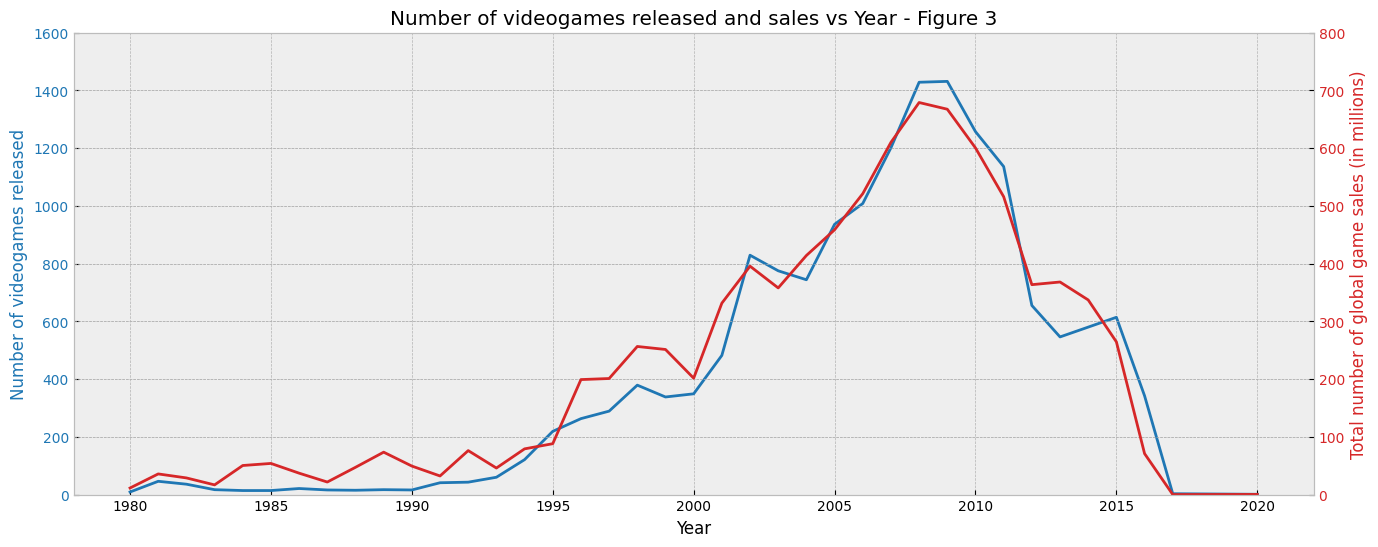

In [ ]:
# Create figure and axis object
fig, ax1 = plt.subplots()

# Set figure sizes
fig.set_size_inches(16, 6)

# Create color blue
color_blue ='tab:blue'

# Count total number of games released each year
releases_count_year = games_df.groupby('Year').count()

# Create a lineplot of the number of game titles released by year
ax1.plot(yearlist, releases_count_year['Global_Sales'], color_blue)

# Set labels and format them
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of videogames released', color = color_blue)
ax1.set_title('Number of videogames released and sales vs Year - Figure 3')
ax1.tick_params(axis='y', labelcolor = color_blue)

# Set y range limit
ax1.set_ylim(0, 1600)

# Get the total number of global sales each year
global_sales_year = games_df.groupby('Year')['Global_Sales'].sum()

ax2 = ax1.twinx()

# Create color as red
color_red ='tab:red'

# Create a lineplot of the total global sales by year
ax2.plot(yearlist, global_sales_year, color_red)

# Set labels and format them
ax2.set_ylabel('Total number of global game sales (in millions)', color = color_red)
ax2.tick_params(axis='y', labelcolor = color_red)

# Set y range limit
ax2.set_ylim(0, 800)

plt.show()

In [ ]:
# Create DataFrame subset with only Nintendo Wii games
wii_df = games_df[games_df['Platform']=='Wii']
wii_df.name = 'wii_df'

# Create DataFrame subset with only PS3 games
ps3_df = games_df[games_df['Platform']=='PS3']
ps3_df.name = 'ps3_df'

# Create DataFrame subset with only Xbox360 games
x360_df = games_df[games_df['Platform']=='X360']
x360_df.name = 'x360_df'

# Create a list with the 3 new DataFrames
gen7_consoles_df_list = [wii_df, ps3_df, x360_df]

# Create empty dictionaries to store 7th generation console yearly sales and number of game releases
gen7_sales_dict = {}
gen7_releases_dict = {}

# Run a for loop to store key value pairs in the relevant dictionary
for platform_df in gen7_consoles_df_list:
    platform_sales = platform_df.groupby('Year')['Global_Sales'].sum()
    platform_releases = platform_df.groupby('Year')['Global_Sales'].count()
    
    key = platform_df.name + '_key'
    gen7_sales_dict[key] = platform_sales
    gen7_releases_dict[key] = platform_releases

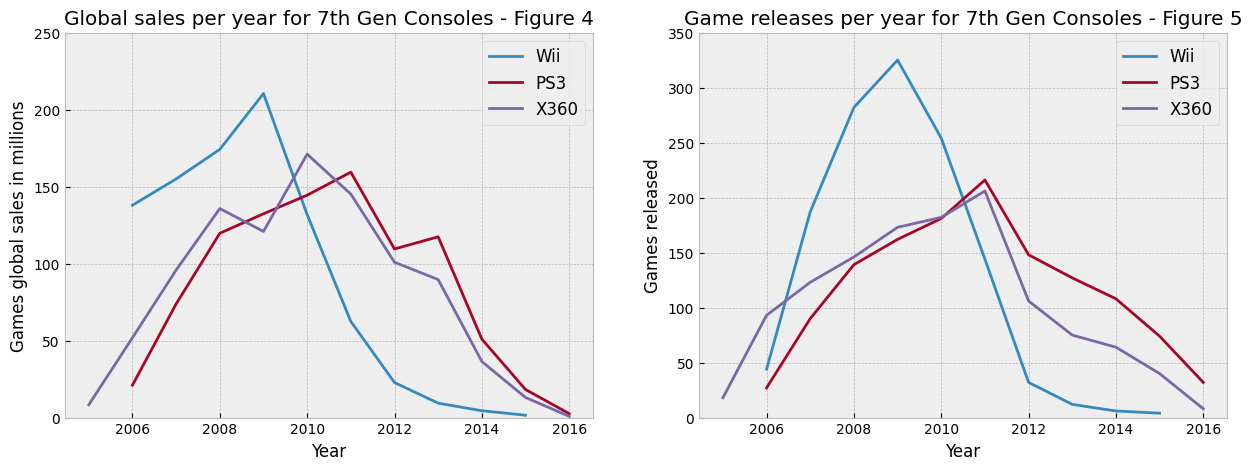

In [ ]:
# Create figure and axis object
fig, ax = plt.subplots(1, 2)

# Set figure sizes
fig.set_size_inches(15, 5)

# Plot global sales by year for 7th Gen consoles
ax[0].plot(gen7_sales_dict['wii_df_key'], label = 'Wii')
ax[0].plot(gen7_sales_dict['ps3_df_key'], label = 'PS3')
ax[0].plot(gen7_sales_dict['x360_df_key'], label = 'X360')

# Set y-range
ax[0].set_ylim(0, 250)

# Add legend
ax[0].legend(prop={'size':12})

# Set labels
ax[0].set_title('Global sales per year for 7th Gen Consoles - Figure 4')
ax[0].set_ylabel('Games global sales in millions')
ax[0].set_xlabel('Year')

# Plot number of games released by year for 7th Gen consoles
ax[1].plot(gen7_releases_dict['wii_df_key'], label = 'Wii')
ax[1].plot(gen7_releases_dict['ps3_df_key'], label = 'PS3')
ax[1].plot(gen7_releases_dict['x360_df_key'], label = 'X360')

# Set y-range
ax[1].set_ylim(0, 350)

# Add legend
ax[1].legend(prop={'size':12})

# Set labels
ax[1].set_title('Game releases per year for 7th Gen Consoles - Figure 5')
ax[1].set_ylabel('Games released')
ax[1].set_xlabel('Year')

plt.show()

### __Insights on Relationship Between Videogame Releases, Sales and Year of Release__

- Figure 3 shows the number of yearly game releases and global sales closely follow one another, seeing similar levels of proportional increase and decrease. Between 1980 and 1990, there were very few videogames releases compared to what would follow in the next decades. From 1990 up until 2008, there is a significant gradual overall increase in the number of videogames produced and global sales, with a steeper decline in the numbers of both game release and sales in the years after.
- Figures 4 and 5 show that between the 3 7th Generation consoles (Wii, PS3 and Xbox360), the Wii had the most game sales and games released in 2007, 2008 and 2009, but sees a sharp decline in both moving into the following years. The PS3 and Xbox360 had similar levels of games sales and new releases since the videogame consoles' debut, and they follow each other closely in terms of sales and new game releases.

## 🎯 3. __Machine Learning__

In this final section, an unsupervised machine learning model will be trained and evaluated to create clusters of games that have similarities and differences according to their number of sales and year of release. 

### __Developing and Evaluating Clustering Machine Learning Model__

1. __Pre-processing__

First the data will be pre-processed to include only numerical columns for the purposes of the clustering algorithm, and transformed so that all variables share a common scale. 

2. __Principal Component Analysis (PCA)__

To allow for dimensionality reduction of the data, a Principal Component Analysis (PCA) will be fit to the data and then the most informative components explaining 90% of the variance in the dataset will be selected. Noisy PCA features will be discarded.

3. __K-Means Clustering__

A clustering algorithm will be trained using the scores of the 2 most informative PCA components. Firstly, the model will be trained with various number of clusters, and then using the "elbow" method, the number of clusters that has the lowest inertia (a measure of how spread out clusters are) and highest number of clusters will be selected.

4. __Clustering Visualization__

Scatterplots will be used to visualize PCA scores from the 1st and 2nd component coloured by cluster classification, and to visualize 2 sales features of the original data coloured by cluster.

Firstly we will standardize the data so that it works across a common scale. This ensures that numerical variables of potentially larger or smaller scale do not overly impact the model's training solely for being very large or very small numbers in comparison to another variable.

In [ ]:
# Instantiate a standard scaler
scaler = StandardScaler()

# Remove categorical columns from original DataFrame for new DataFrame: games_df_rel
games_df_rel = games_df.drop(['Name','Platform','Genre','Publisher'], axis=1)

# Scale the numerical data to a common scale: games_df_train
games_df_train = scaler.fit_transform(games_df_rel)

In [ ]:
# Instantiate PCA model
pca_exp = PCA()

# Fit PCA model to training data
pca_exp.fit(games_df_train)

# Store cumulative sum of explained variance ratio attribute of PCA: pca_var_exp
pca_var_exp = pca_exp.explained_variance_ratio_.cumsum()

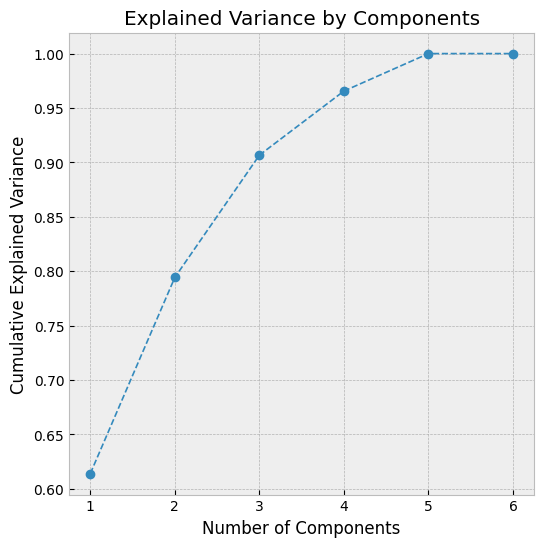

In [ ]:
# Set figure size
plt.figure(figsize = (6, 6))

# Plot cumulative explained variance by number of components
plt.plot(range(1, len(pca_var_exp) + 1), pca_var_exp, marker = 'o', linestyle = '--', linewidth = 1.2)

# Set labels
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

In [ ]:
# Instantiate PCA with 3 components
pca = PCA(n_components = 3)

# Fit the PCA model to the training data
pca.fit(games_df_train)

# Get component scores of PCA: scores_pca
scores_pca = pca.transform(games_df_train)

scores_pca

array([[ 1.00202617e+02,  1.30100459e+01, -1.69414155e+01],
       [ 4.16145004e+01, -9.62610863e+00,  1.03547790e+01],
       [ 4.35341104e+01,  3.02722774e+00, -7.53532664e-01],
       ...,
       [-6.66463354e-01,  2.40795598e-01,  6.68428668e-02],
       [-6.71999965e-01,  5.48909138e-01,  2.15739623e-01],
       [-6.23522928e-01, -5.23158009e-01, -3.12564780e-01]])

In [ ]:
# Create list empty list to store inertias
inertia = []

# Train KMeans algorithm with PCA component scores different number of clusters and get inertia of each
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, random_state = 42)
    kmeans_pca.fit(scores_pca)
    inertia.append(kmeans_pca.inertia_)

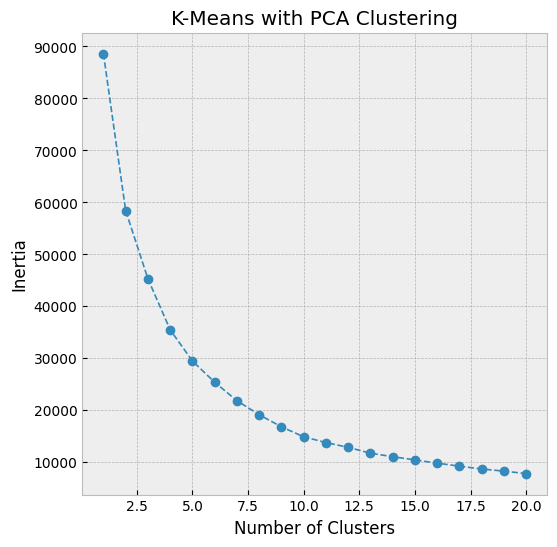

In [ ]:
# Set figure size
plt.figure(figsize = (6, 6))

# Create plot of inertia by number of clusters
plt.plot(range(1, 21), inertia, marker = 'o', linestyle = '--', linewidth = 1.2)

# Set labels
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-Means with PCA Clustering')

plt.show()

In [ ]:
# Instantiate KMeans algorithm with 4 clusters
kmeans_pca = KMeans(n_clusters = 4, random_state=42)

# Fit the model to the PCA scores
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Concatenate the Games DataFrame to the newly create
games_df_pca_kmeans = pd.concat([games_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)

# Rename the two PCA component scores for clarity
games_df_pca_kmeans.rename(columns={0 : 'Component 1', 1 : 'Component 2', 2 : 'Component 3'}, inplace = True)

# Create column containing the corresponding KMeans cluster label based on the component scores for each observation
games_df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

# Create column with the Kmeans cluster label name
games_df_pca_kmeans['Segment'] = games_df_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'})

games_df_pca_kmeans.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Component 1,Component 2,Component 3,Segment K-means PCA,Segment
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,100.202617,13.010046,-16.941416,1,second
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,41.614500,-9.626109,10.354779,1,second
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,43.534110,3.027228,-0.753533,1,second
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,39.490588,2.873477,-0.963417,1,second
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,37.363118,-10.189169,20.767552,1,second
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.570843,-6.499570,5.241845,1,second
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,37.554921,-1.856141,8.278287,1,second
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,34.913297,2.245294,-1.299821,1,second
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,33.615378,-0.649711,5.017263,1,second
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,26.260058,-3.214263,-5.361913,1,second


### __Insights on Clustering Model Development__

- The PCA model trained with the numerical data from the DataFrame shows that with __3 components explain approximately 90% of the variance__, while the remaining 3 components explain only about 10%.
- Visualing Inertia vs the Number of Clusters reveals that __the optimal number of clusters is about 4 or 5 clusters__, minimizing the inertia while maximizing the number of clusters. 4 clusters were used for the final KMeans model.

### __Visualizing Clusterings__

Lastly, we will create scatterplots to analyze the relationship between the first 2 PCA Components, and analyze the relationship between 2 sales features from the original dataset. In these plots, the observations will be coloured by their cluster to help visualize the clustering.

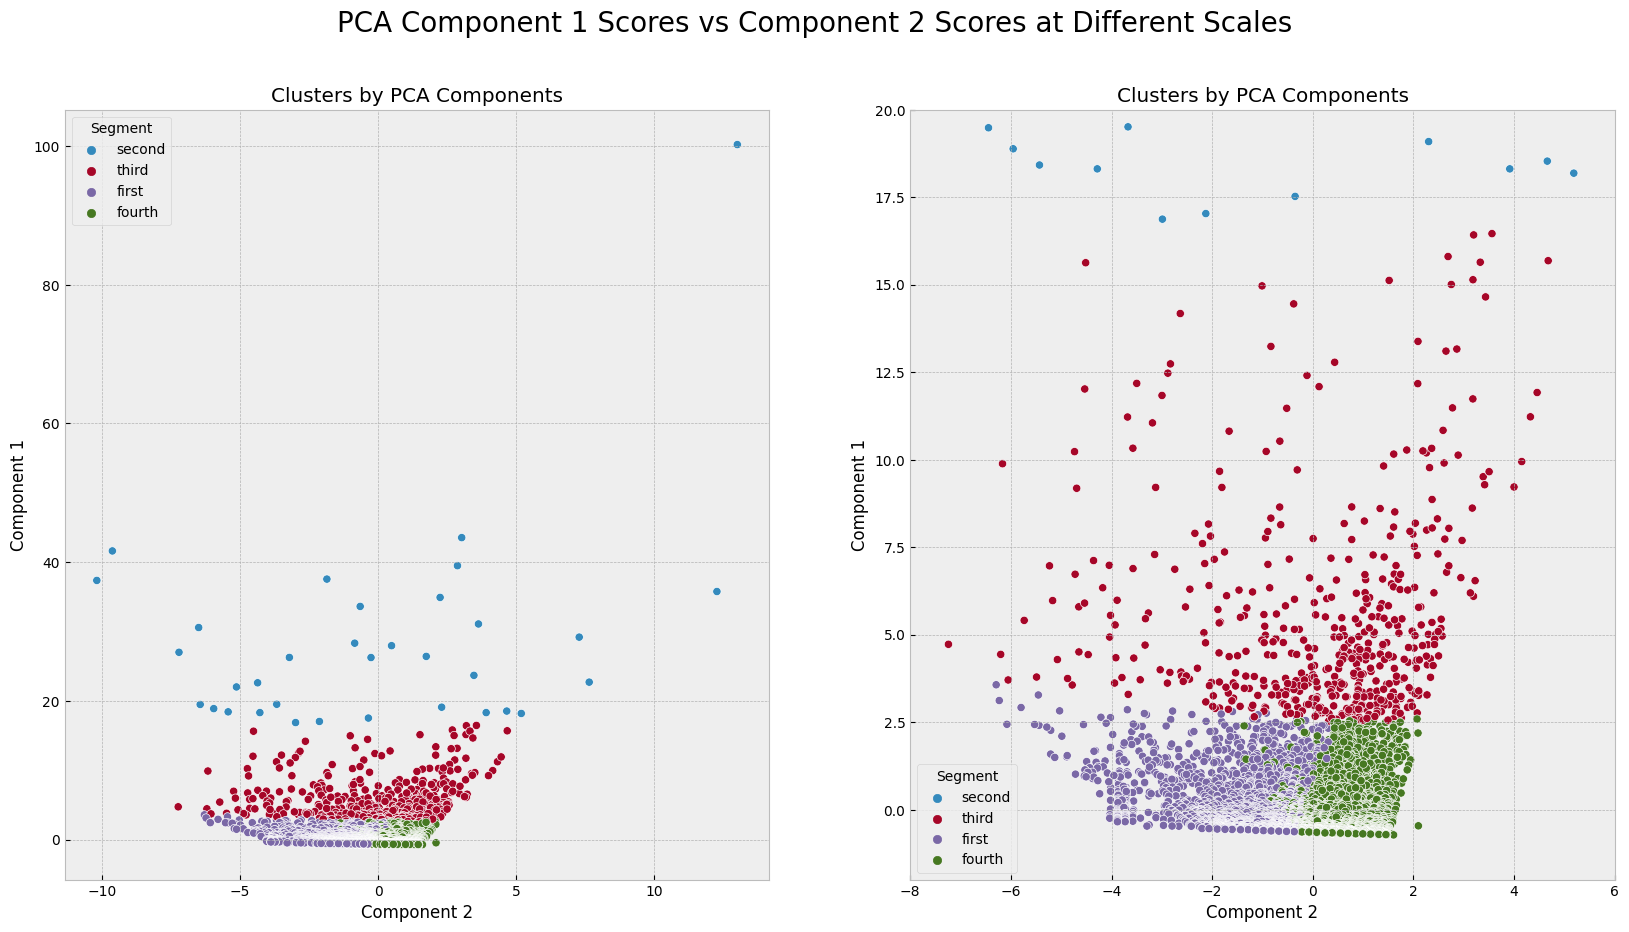

In [ ]:
# Create figure and axis object
fig, ax = plt.subplots(1, 2)

# Set single title for subplots
fig.suptitle('PCA Component 1 Scores vs Component 2 Scores at Different Scales', fontsize = 20)

# Set figure size
fig.set_size_inches(20, 10)

# Get the PCA scores of the first 2 components and plot them in a scatterplot
x_comp = games_df_pca_kmeans['Component 2']
y_comp = games_df_pca_kmeans['Component 1']
sns.scatterplot(x = x_comp, y = y_comp, hue = games_df_pca_kmeans['Segment'], ax=ax[0])

# Set labels
ax[0].set_title('Clusters by PCA Components')

# Plot the same scatterplot zooming in to the samples
sns.scatterplot(x = x_comp, y = y_comp, hue = games_df_pca_kmeans['Segment'], ax=ax[1])

ax[1].set_ylim(-2, 20)
ax[1].set_xlim(-8, 6)

# Set labels
ax[1].set_title('Clusters by PCA Components')

plt.show()

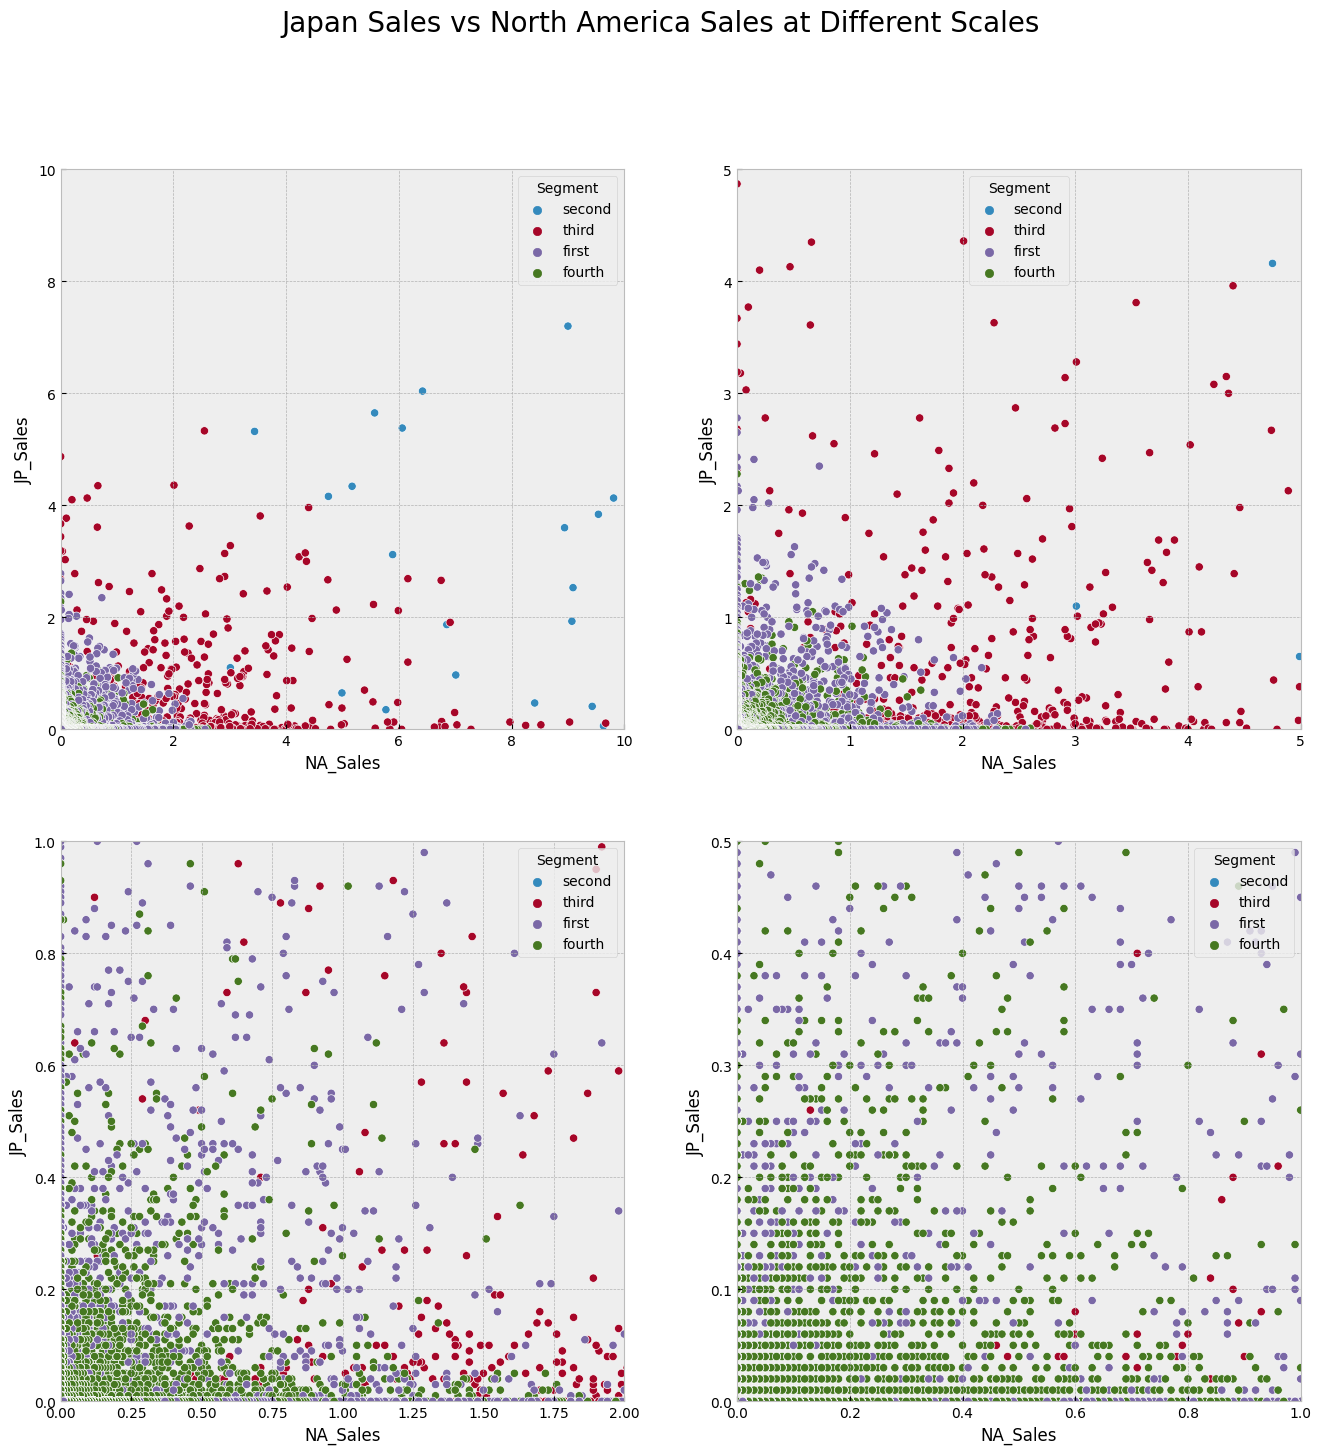

In [ ]:
# Create figure and axis object
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Set figure size
fig.set_size_inches(16, 16)

# Set single title for subplots
fig.suptitle('Japan Sales vs North America Sales at Different Scales', fontsize = 20)

# Create scatterplot of EU_Sales vs NA_Sales
sns.scatterplot(x = games_df_pca_kmeans['NA_Sales'], y = games_df_pca_kmeans['JP_Sales'], hue = games_df_pca_kmeans['Segment'], ax = ax1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Create scatterplot of EU_Sales vs NA_Sales with different scale
sns.scatterplot(x = games_df_pca_kmeans['NA_Sales'], y = games_df_pca_kmeans['JP_Sales'], hue = games_df_pca_kmeans['Segment'], ax = ax2)
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

# Create scatterplot of EU_Sales vs NA_Sales with different scale
sns.scatterplot(x = games_df_pca_kmeans['NA_Sales'], y = games_df_pca_kmeans['JP_Sales'], hue = games_df_pca_kmeans['Segment'], ax = ax3)
ax3.set_xlim(0, 2)
ax3.set_ylim(0, 1)

# Create scatterplot of EU_Sales vs NA_Sales with different scale
sns.scatterplot(x = games_df_pca_kmeans['NA_Sales'], y = games_df_pca_kmeans['JP_Sales'], hue = games_df_pca_kmeans['Segment'], ax = ax4)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 0.5)

plt.show()

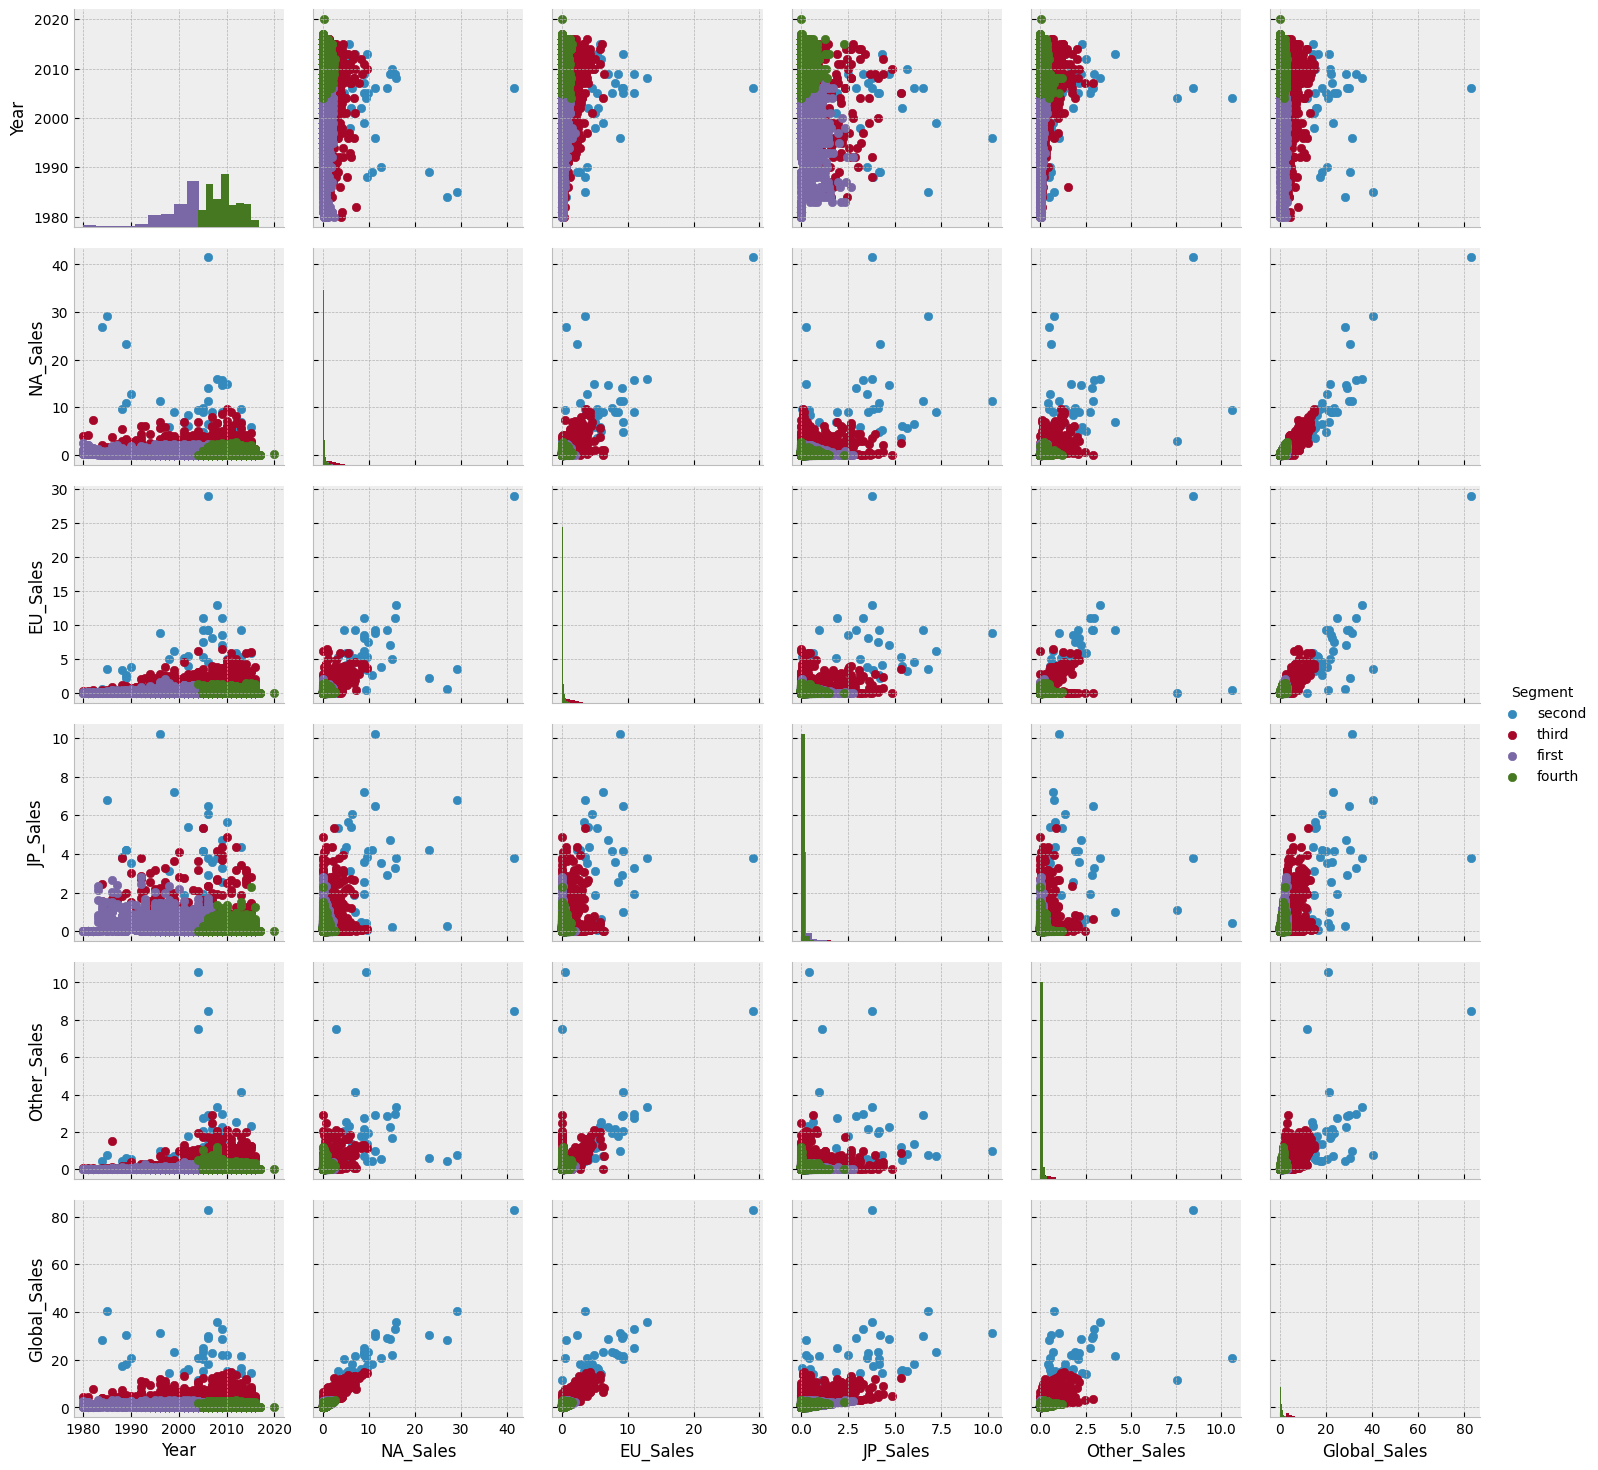

In [ ]:
# Create PairGrid of the numerical features of the data colouring by cluster
g = sns.PairGrid(games_df_pca_kmeans.drop(['Name', 'Platform', 'Genre', 'Publisher', 'Component 1', 'Component 2', 'Component 3', 'Segment K-means PCA'], axis = 1), hue = 'Segment')

# Set diagonal to be histograms
g.map_diag(plt.hist)

# Turn off scatterplot on diagonal
g.map_offdiag(plt.scatter)

# Create legend
g.add_legend()

plt.show()

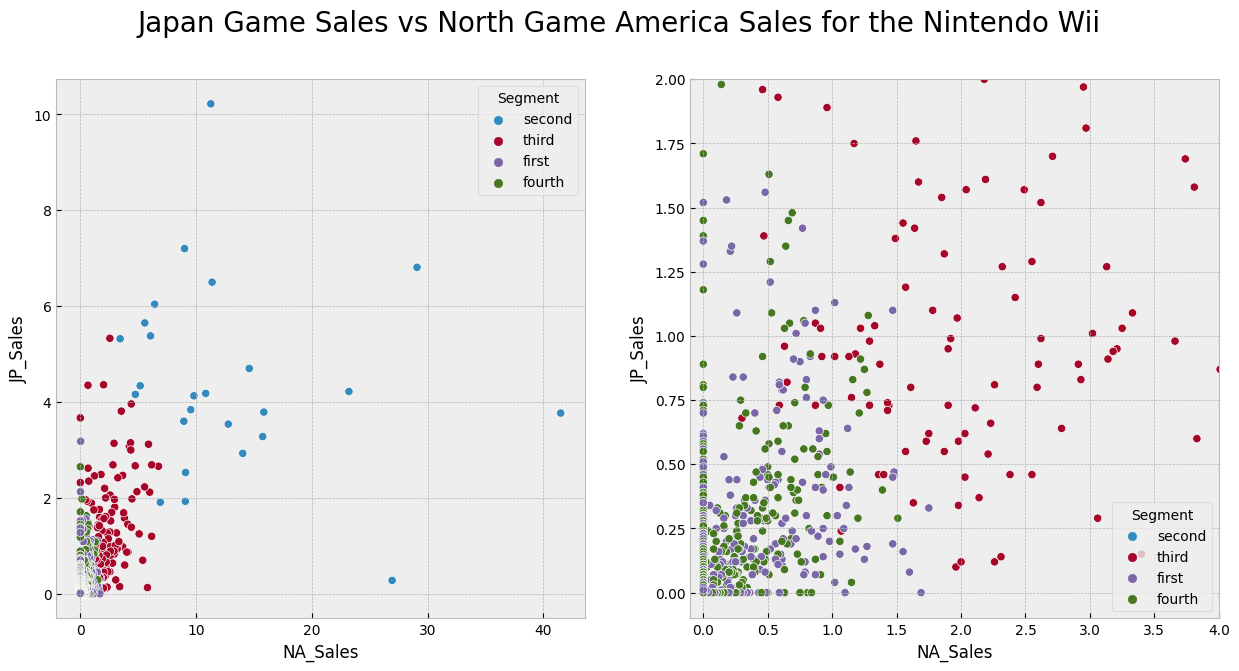

In [ ]:
# Subset DataFrame to include only Nintendo games
nintendo_df = games_df[games_df['Publisher'] == 'Nintendo']

# Create figure and axis object
fig, ax = plt.subplots(1, 2)

# Set single title for subplots
fig.suptitle('Japan Game Sales vs North Game America Sales for the Nintendo Wii', fontsize = 20)

# Set figure size
fig.set_size_inches(15, 7)

# Plot Japan sales vs North America sales of videogames for Nintendo Wii
sns.scatterplot(x = 'NA_Sales', y = 'JP_Sales', data = nintendo_df, hue = games_df_pca_kmeans.Segment, ax=ax[0])
sns.scatterplot(x = 'NA_Sales', y = 'JP_Sales', data = nintendo_df, hue = games_df_pca_kmeans.Segment, ax=ax[1])

# Set ranges for second plot
ax[1].set_ylim(-0.1, 2)
ax[1].set_xlim(-0.1, 4)

plt.show()

In [ ]:
# Count the number of samples belonging to each cluster
games_df_pca_kmeans['Segment'].value_counts()

fourth    10674
first      5065
third       518
second       34
Name: Segment, dtype: int64

### __Insights from Clustering Visualization__

- The KMeans model generated 4 clusters. From the graphs explored it appears that the clusters corresponds to tiers in terms of sales numbers among the videogames, with the first and fourth clusters being more heavily influenced by the <code>Year</code> variable.
- The __fourth cluster example appears to consist of the most "common" samples__ with 10,674 games, where all samples are concentrated around the lower range of sales numbers.
- The __first cluster tends to show higher sales numbers on average than the samples in the fourth cluster__ with 5,065 games, although they are fairly intermingled with the fourth cluster when visualized through a 2D plot. Interestingly, these samples also correspond to videogames that were sold primarily between 1980 and 2005.
- The __second cluster appears to consist of the outliers in the data__, which are games with extraordinary sales numbers compared to all the others. Consequently, there are only a small fraction of all games here with 34 games.
- Finally, the __third cluster consists of games which generally have a higher number of sales__, but not as high as the second cluster.
- The most extreme outlier value visible in several of the plots produced corresponds to "Wii Sports" a game that came with the Nintendo Wii console. If K-means was instantiated with 5 clusters instead of 4, it would have classified Wii Sports in a cluster of its own by itself.

## __Conclusion__

This exploration of videogame sales data through data manipulation and visualization has allowed for a deeper understanding around the magnitude of games sales, count of new videogame titles and how these compare between different regions and platforms. In addition, plotting these over time, and with a focus on the 7th generation consoles, allows for a comparative sales analysis over the years and between different competing videogame publishers.

The __clustering analysis could be beneficial for game designers and publishers to maximize sales__, as they can look further into games that were classified in the second and third clusters and were published recently, as these appear to consist of the latest "best sellers" out of all the videogames. By studying attributes of these games such as the games' titles, genre and platform, as well as other characteristics not captured in this dataset, such as the game's design and their marketing campaigns, patterns can be identified to help design and publish future successful games.

> Thanks

If you made it this far in looking through my project, thank you for your time :)